In [1]:
#Load some modules etc
%matplotlib inline
import matplotlib.pyplot as plt
from sympy import *
import scipy as sc
import numpy as np
init_printing()

# Interaction estimates
Just some checking of the the interaction estimates

In [2]:
#define variables
t,N = var("t,N")
#State vars
C_1 = Function("C_1")(t)
C_2 = Function("C_2")(t)
C_tot = Function("C_tot")(t) 
#Params
r_1,r_2,r_tot = var("r_1,r_2,r_tot")
a_12,a_21 = var("a_12,a_21")
a_11,a_22 = var("a_11,a_22")
a = var("alpha")

#derivatives
dC_1 = C_1 * (r_1 + (C_1*a_11) + (C_2*a_12) )
dC_2 = C_2 * (r_2 + (C_2*a_22) + (C_1*a_21) )

dC_1, dC_2

In [3]:
#total equation
equ = Eq(C_tot * r_tot,dC_1 + dC_2)
equ

In [4]:
x = equ.subs({C_1:C_tot/2,C_2:C_tot/2,a_12:a,a_21:a})
x

In [5]:
(expand(solve(x,a)[0]))

and with carrying capacity ($K$).

In [6]:
K_1,K_2 = var("K_1,K_2")

(expand(solve(x,a)[0])).subs({a_11:r_1/K_1, a_22:r_2/K_2})

# Community Biomass Approximations

In [68]:
#define variables
t,N,T = var("t,N,T")
#State vars
C = Function("C")(t)
r,ur,ur2,sr = var("r,mu_r,mu_r_2,sigma_r")
a,ua = var("a,mu_a")
p,up = var("psi,mu_psi")

uC = -(ur/ua)*(1/(1+ (up/ua)))
C = (-r - p*uC)/a

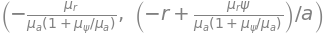

In [69]:
uC , C

In [70]:
cov = (C*r).expand().subs({r:ur,a:ua,r**2:ur2,p:up}) 

(cov - uC*ur).factor()

## Approximating Total Biomass

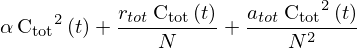

In [9]:
dC_tot_app = dC_tot.subs({C_1:C_tot/N,C_2:C_tot/N,C_3:C_tot/N})

dC_tot_app = expand(dC_tot_app).subs({r_1*C_tot/N + r_2*C_tot/N + r_3*C_tot/N:r_tot*C_tot/N,
                         a_1*C_tot**2/N**2 + a_2*C_tot**2/N**2 + a_3*C_tot**2/N**2 : a_tot * C_tot **2 / N**2,
                         3*a*C_tot**2:N*a*C_tot**2})
dC_tot_app

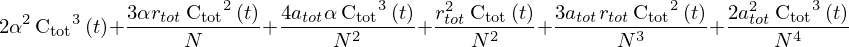

In [10]:
dC2_tot = dC_tot_app.diff(t)
dC_tot_symb = dC2_tot.args[0].args[2]
dC2_tot = expand(dC2_tot.subs({dC_tot_symb:dC_tot_app}))
collect(dC2_tot,a)
dC2_tot

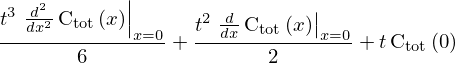

In [11]:
int_C_tot = series(integrate(C_tot,t),x = t ,x0 = 0,n = 4).removeO()
int_C_tot

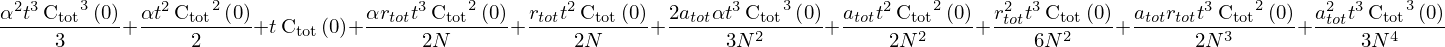

In [12]:
dC_tot_symb = int_C_tot.args[1].args[2]
dC2_tot_symb = int_C_tot.args[2].args[2]
C_tot_t = expand(int_C_tot.subs({dC_tot_symb:dC_tot_app.subs({t:0}), dC2_tot_symb:dC2_tot.subs({t:0})}))
C_tot_t

# Approximating individual biomass

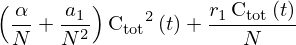

In [68]:
#First derivative
dC_1_app = collect(expand(dC_1.subs({C_1:C_tot/N})),C_tot)
dC_1_app

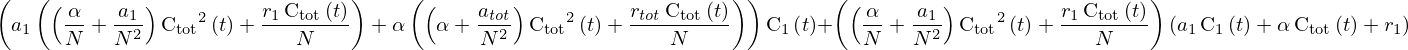

In [80]:
#second derivative
dC2_1_app = dC_1.diff(t)
dC_1_symb = dC2_1_app.args[0].args[0].args[0].args[1]
dC_tot_symb = dC2_1_app.args[0].args[0].args[1].args[1]

dC2_1_app = dC2_1_app.subs({dC_1_symb:dC_1_app, dC_tot_symb:dC_tot_app})
dC2_1_app

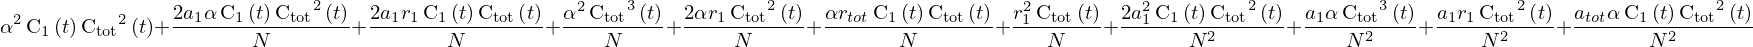

In [86]:
collect(expand(dC2_1_app),a)

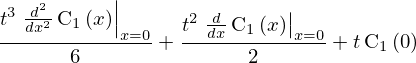

In [15]:
int_C_1_tot = series(integrate(C_1,t),x = t ,x0 = 0,n = 4).removeO()
int_C_1_tot

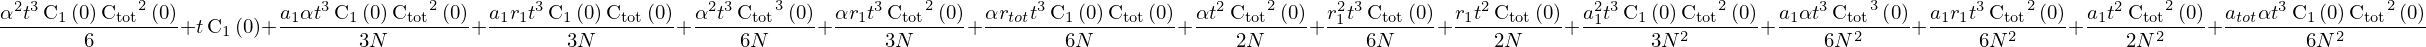

In [16]:
dC_1_symb = int_C_1_tot.args[1].args[2]
dC2_1_symb = int_C_1_tot.args[2].args[2]
C_1_t = expand(int_C_1_tot.subs({dC_1_symb:dC_1_app.subs({t:0}), dC2_1_symb:dC2_1_app.subs({t:0})}))
C_1_t

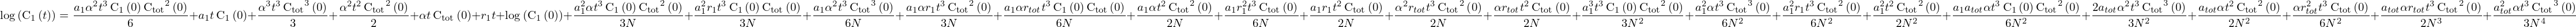

In [17]:
const = var("const")

C_1_Eq = Eq(integrate(diff(C_1,t)/C_1,t) , expand(integrate(dC_1/C_1,t)))
x = C_1_Eq.args[1].args[0]
y = C_1_Eq.args[1].args[1]
z = C_1_Eq.args[1].args[2]

x,y,z

sol = C_1_Eq.subs({ x:r_1*t + const, y:a_1*C_1_t, z:a*C_tot_t,const:log(C_1.subs(t,0)) })

expand(sol)

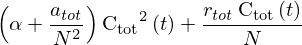

In [18]:
dC_tot_app = dC_tot.subs({C_1:C_tot/N,C_2:C_tot/N,C_3:C_tot/N})
dC_tot_app = expand(dC_tot_app).subs({r_1*C_tot/N + r_2*C_tot/N + r_3*C_tot/N:r_tot*C_tot/N,
                         a_1*C_tot**2/N**2 + a_2*C_tot**2/N**2 + a_3*C_tot**2/N**2 : a_tot * C_tot **2 / N**2,
                         3*a*C_tot**2:N*a*C_tot**2})

dC_tot_app = collect(dC_tot_app,C_tot)
dC_tot_app

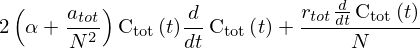

In [19]:
dC_tot_app.diff(t)

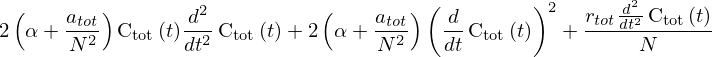

In [20]:
dC_tot_app.diff(t,t)

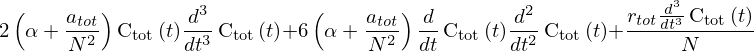

In [21]:
dC_tot_app.diff(t,t,t)

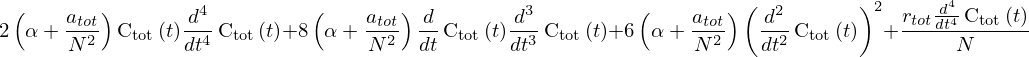

In [22]:
dC_tot_app.diff(t,t,t,t)

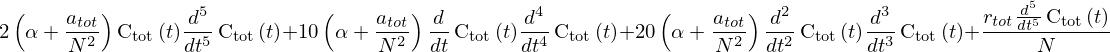

In [23]:
dC_tot_app.diff(t,t,t,t,t)

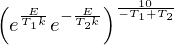

In [11]:
Q10,R1,R2,T1,T2 = var("Q10,R1,R2,T1,T2")
R0,E,k = var("R0,E,k")

Q10_eq = (R2/R1)**(10/(T2-T1))

x = Q10_eq.subs({R1:R0*exp(-E/(k*T1)), R2:R0*exp(-E/(k*T2))})

x

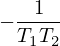

In [23]:
simplify(expand((1/T1 - 1/T2) *  (1 / (T1 - T2))))

# Another Biomass Approximation

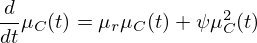

In [2]:
t = var("t")
r,r_μ = var("r,\mu_{r}")
p = var("\psi")
C = Function("C")(t)
C_μ = Function("\mu_{C}")(t)

r0,E,T = var("r_0,E,T")
r = r0*exp(E*T)

dC = Eq(C_μ.diff(t),r_μ*C_μ + p*C_μ**2)
dC

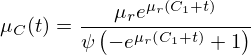

In [3]:
dC_sol = dsolve(dC,C_μ)
dC_sol

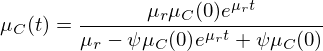

In [4]:
C1 = dC_sol.args[1].args[3].args[0].args[1].args[0]
C1_sol = solve(dC_sol.subs(t,0),C1)[0]

C_sol = simplify(dC_sol.subs(C1,C1_sol))
C_sol

In [5]:
C_sol.args[1].subs(t,0)

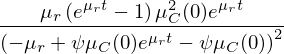

In [6]:
f = factor(C_sol.args[1].diff(p))
f

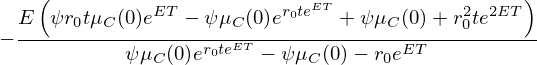

In [7]:
g = factor(log(C_sol.args[1].subs(r_μ,r)).diff(T))
g

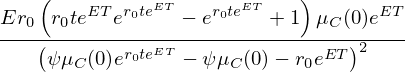

In [8]:
h = factor(log(C_sol.args[1].subs(r_μ,r)).diff(T,p))
h

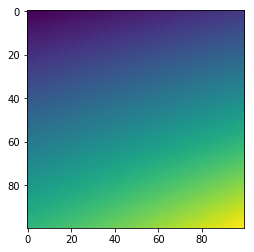

In [9]:
f_2_lam = g.subs({r0:1.0,E:0.10,C_μ.subs(t,0):0.01, t:2.5})
f_lam = np.vectorize(lambdify((T,p), f_2_lam))

p_vec = np.linspace(-3.0,1.0, num=100)
T_vec = np.linspace(-1.0,1.0, num=100)

res = f_lam(p_vec[:, np.newaxis],T_vec)

plt.imshow(np.log(res))

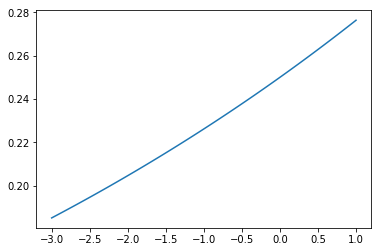

In [17]:
 plt.plot(p_vec,f_lam(p_vec,0.0))

#  total respiration approximation


In [62]:
t,T,T_ref,a = var("t,T,T_ref,a")
C_1 = Function("C_1")(t,T)
C_2 = Function("C_2")(t,T)

R_1 = Function("R_1")(T)
R_2 = Function("R_2")(T)

R0_1,R0_2,E_R1,E_R2 = var("R0_1,R0_2,E_R1,E_R2")

R1 = R0_1 * exp(-E_R1 * (T - T_ref))
R2 = R0_2 * exp(-E_R2 * (T - T_ref))

R1 + R2

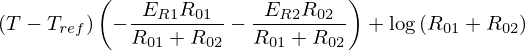

In [63]:
log(R1+R2).series(x=T,x0=T_ref,n=2).removeO()

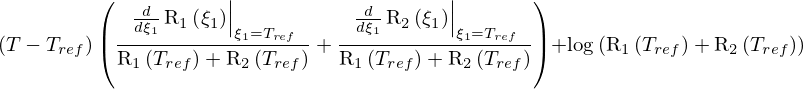

In [64]:
series(log(R_1 + R_2), n=2, x=T, x0=T_ref).removeO()

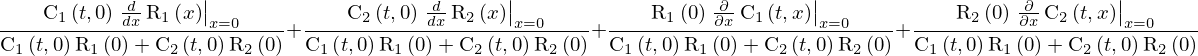

In [71]:
log(C_1*R_1+C_2*R_2).series(x=T,x0=0,n=2).removeO().diff(T)

In [75]:
R1.subs(T-T_ref , a) .diff(a).subs(a,0)